# ITC.NS: ITC Limited 

# STEP #1: IMPORTING DATA

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# STEP #2: EXPLORING THE DATASET

In [2]:
df = pd.read_csv('ITC.NS.csv', error_bad_lines=False)
df

,Date,Close
0,7/15/2010,100.032997
1,7/16/2010,99.449997
2,7/19/2010,97.116699
3,7/20/2010,97.150002
4,7/21/2010,97.449997
...,...,...
2463,7/8/2020,196.300003
2464,7/9/2020,195.449997
2465,7/10/2020,194.350006
2466,7/13/2020,197.550003


In [3]:
df.dropna(inplace = True)

In [4]:
df.isna().sum()

Date     0
Close    0
dtype: int64

In [5]:
df.index = pd.DatetimeIndex(df['Date'])
df.head()

,Date,Close
Date,,
2010-07-15,7/15/2010,100.032997
2010-07-16,7/16/2010,99.449997
2010-07-19,7/19/2010,97.116699
2010-07-20,7/20/2010,97.150002
2010-07-21,7/21/2010,97.449997


In [6]:
del df['Date']
df.head()

,Close
Date,
2010-07-15,100.032997
2010-07-16,99.449997
2010-07-19,97.116699
2010-07-20,97.150002
2010-07-21,97.449997


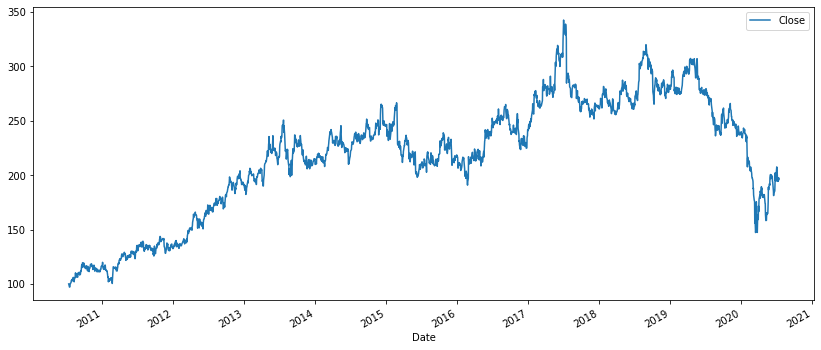

In [7]:
df.plot(figsize = (14,6))     # ORIGNAL DATA

Text(0, 0.5, 'Close')

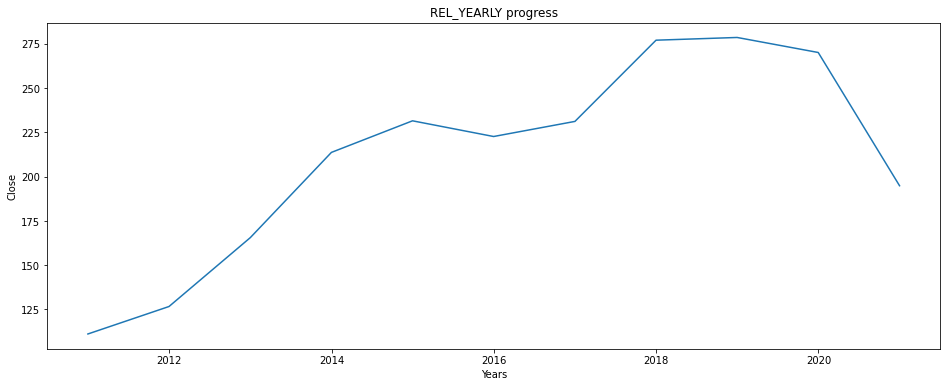

In [8]:
# Resample is a Convenience method for frequency conversion and resampling of time series.
# Yearly
plt.figure(figsize=(16,6))
plt.plot(df.resample('Y').mean())
plt.title('REL_YEARLY progress')
plt.xlabel('Years')
plt.ylabel('Close')

Text(0, 0.5, 'Close')

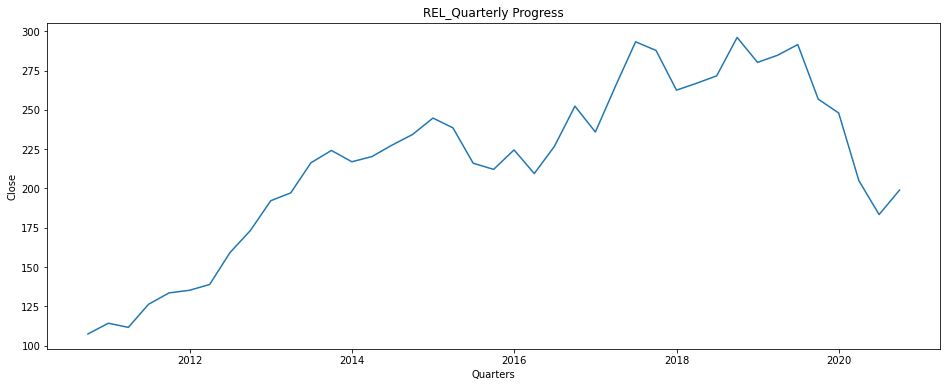

In [9]:
# Quaterly
plt.figure(figsize=(16,6))
plt.plot(df.resample('Q').mean())
plt.title('REL_Quarterly Progress')
plt.xlabel('Quarters')
plt.ylabel('Close')

Text(0, 0.5, 'Close')

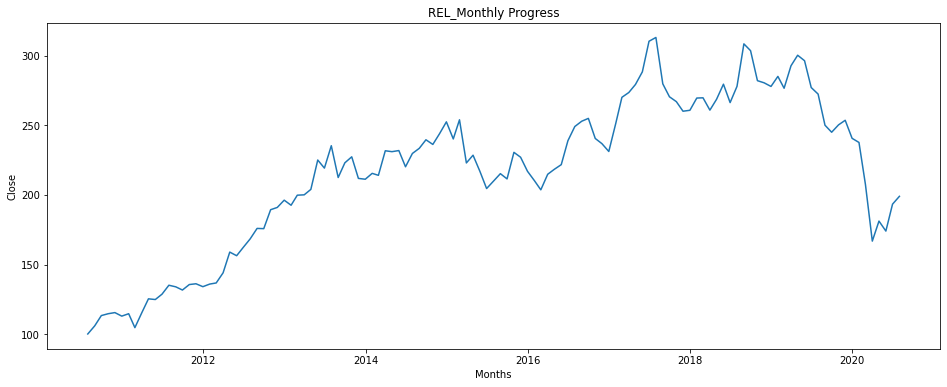

In [10]:
# Resample is a Convenience method for frequency conversion and resampling of time series.
plt.figure(figsize=(16,6))
plt.plot(df.resample('M').mean())
plt.title('REL_Monthly Progress')
plt.xlabel('Months')
plt.ylabel('Close')

Text(0, 0.5, 'Close')

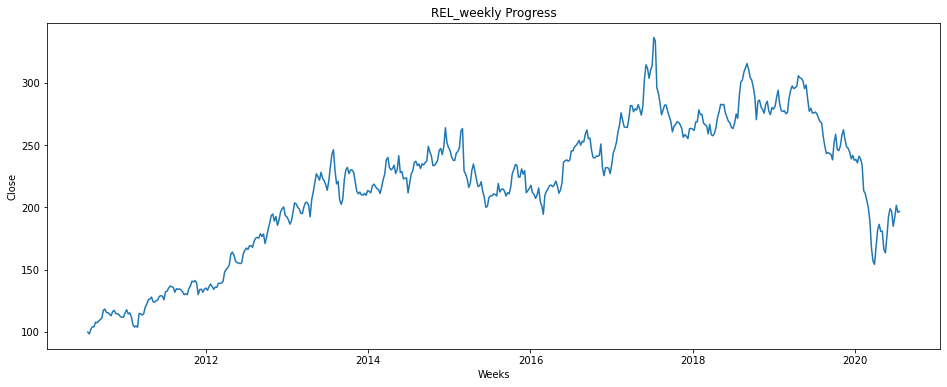

In [11]:
plt.figure(figsize=(16,6))
plt.plot(df.resample('W').mean())
plt.title('REL_weekly Progress')
plt.xlabel('Weeks')
plt.ylabel('Close')

Text(0, 0.5, 'Close')

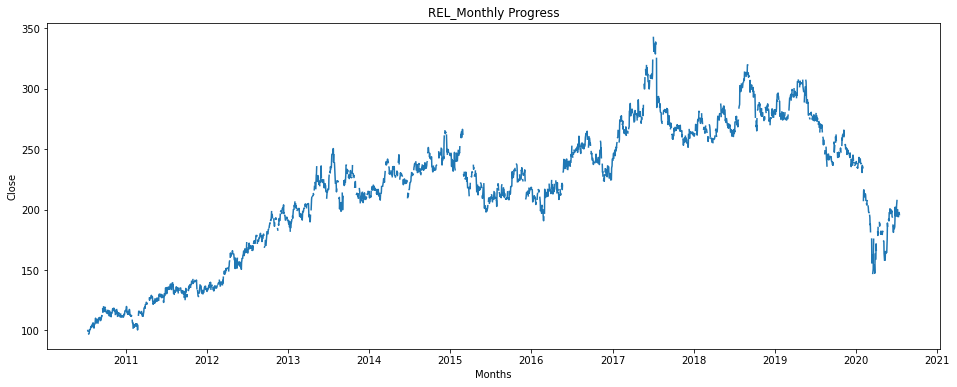

In [12]:
plt.figure(figsize=(16,6))
plt.plot(df.resample('D').mean())
plt.title('REL_Monthly Progress')
plt.xlabel('Months')
plt.ylabel('Close')

# STEP #3: PREPARING THE DATA¶

In [13]:
df

,Close
Date,
2010-07-15,100.032997
2010-07-16,99.449997
2010-07-19,97.116699
2010-07-20,97.150002
2010-07-21,97.449997
...,...
2020-07-08,196.300003
2020-07-09,195.449997
2020-07-10,194.350006


In [14]:
df_Prophet = df.resample('D').mean().reset_index()

df_Prophet.index = pd.DatetimeIndex(df_Prophet['Date'])

df_Prophet

,Date,Close
Date,,
2010-07-15,2010-07-15,100.032997
2010-07-16,2010-07-16,99.449997
2010-07-17,2010-07-17,NaN
2010-07-18,2010-07-18,NaN
2010-07-19,2010-07-19,97.116699
...,...,...
2020-07-10,2020-07-10,194.350006
2020-07-11,2020-07-11,NaN
2020-07-12,2020-07-12,NaN


In [15]:
df_Prophet.isna().sum()

Date        0
Close    1192
dtype: int64

In [16]:
df_rolling_W2 = df.rolling(window=1).mean().reset_index()
df_rolling_W2

,Date,Close
0,2010-07-15,100.032997
1,2010-07-16,99.449997
2,2010-07-19,97.116699
3,2010-07-20,97.150002
4,2010-07-21,97.449997
...,...,...
2456,2020-07-08,196.300003
2457,2020-07-09,195.449997
2458,2020-07-10,194.350006
2459,2020-07-13,197.550003


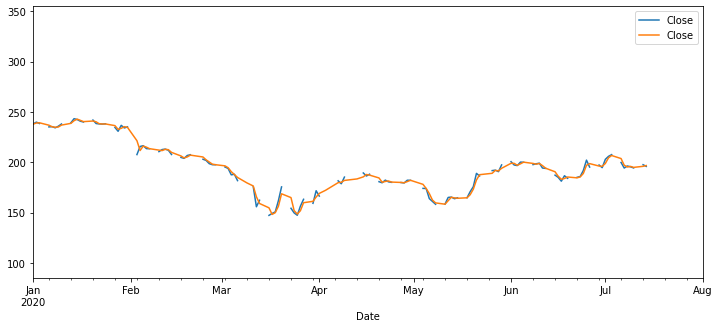

In [17]:
df_Prophet['Close'].plot(figsize=(12,5),legend = True)   # TRUE DATA
df.rolling(window=2).mean()['Close'].plot(legend = True,xlim = ['2020-01-01','2020-08-01']); # ROLLING MEAN

In [18]:
#preparing data
df = df_rolling_W2.rename(columns={'Date':'ds', 'Close':'y'})

df

,ds,y
0,2010-07-15,100.032997
1,2010-07-16,99.449997
2,2010-07-19,97.116699
3,2010-07-20,97.150002
4,2010-07-21,97.449997
...,...,...
2456,2020-07-08,196.300003
2457,2020-07-09,195.449997
2458,2020-07-10,194.350006
2459,2020-07-13,197.550003


# STEP #4: MODEL

In [19]:
m = Prophet()
m.fit(df)


future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [20]:
forecast.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2463,2020-07-17,200.269212,188.667482,228.803871,200.269212,200.269212,8.383812,8.383812,8.383812,0.688521,0.688521,0.688521,7.695291,7.695291,7.695291,0.0,0.0,0.0,208.653024
2464,2020-07-18,200.135280,189.248555,225.531300,200.135280,200.135280,6.699223,6.699223,6.699223,-0.931023,-0.931023,-0.931023,7.630245,7.630245,7.630245,0.0,0.0,0.0,206.834503
2465,2020-07-19,200.001349,187.724628,225.520557,200.001349,200.001349,6.595229,6.595229,6.595229,-0.931023,-0.931023,-0.931023,7.526251,7.526251,7.526251,0.0,0.0,0.0,206.596578
2466,2020-07-20,199.867418,188.967513,226.646731,199.867418,199.867418,7.695567,7.695567,7.695567,0.307393,0.307393,0.307393,7.388174,7.388174,7.388174,0.0,0.0,0.0,207.562985
2467,2020-07-21,199.733486,189.469528,225.645587,199.733486,199.733486,7.565674,7.565674,7.565674,0.344483,0.344483,0.344483,7.221191,7.221191,7.221191,0.0,0.0,0.0,207.299161


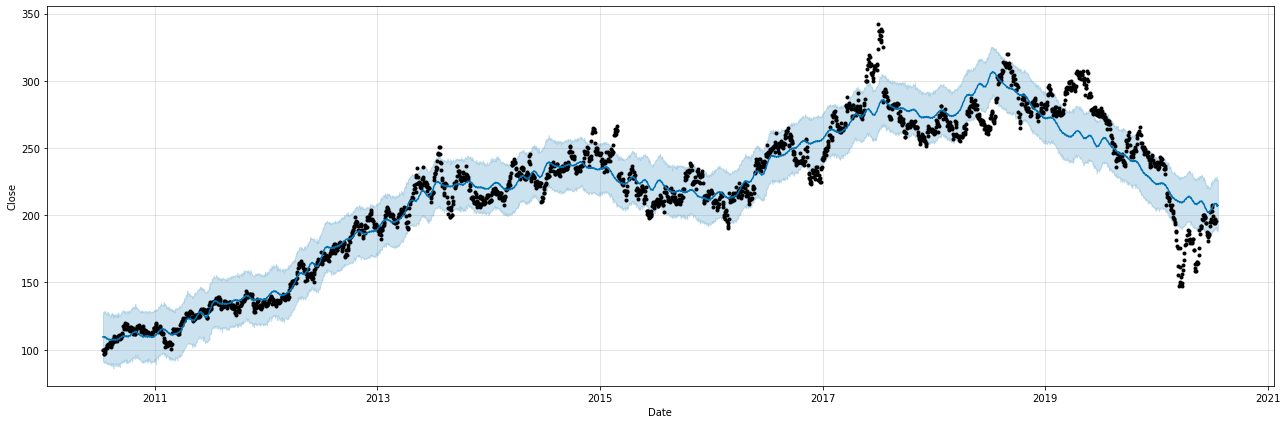

In [21]:
figure = m.plot(forecast, xlabel='Date', ylabel='Close', figsize=(18,6))

# BLACK DOT REPRESENTS THE ORIGNAL DATA
# BLACK DOT REPRESENTS THE PREDICTED DATA / TREND

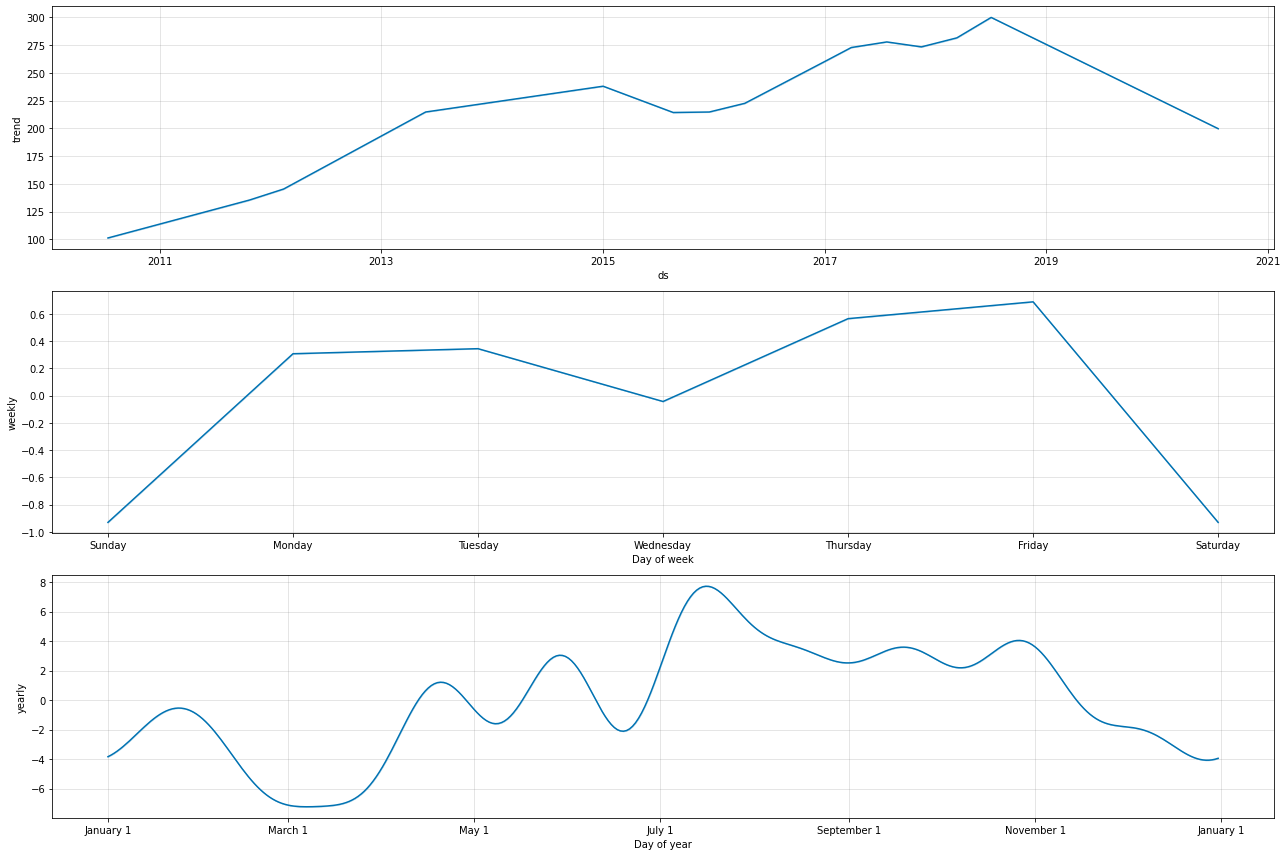

In [22]:
figure2 = m.plot_components(forecast, figsize=(18,12))

In [23]:
forc = forecast[['ds','yhat']]
forc = forc.rename(columns={'ds':'Date', 'yhat':'forecast_Close'})
forc.tail(12)

,Date,forecast_Close
2456,2020-07-08,207.472381
2457,2020-07-09,208.339312
2458,2020-07-10,208.671949
2459,2020-07-13,208.599460
2460,2020-07-14,208.631105
2461,2020-07-15,208.185168
2462,2020-07-16,208.685129
2463,2020-07-17,208.653024
2464,2020-07-18,206.834503
2465,2020-07-19,206.596578


**FINAL FORECAST**